In [23]:
# Librerias para manejo de datos
import pandas as pd
import numpy as np

# Librerias para preprocesamiento y visualizacion de datos
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para implementar redes neuronales
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

In [24]:
data = pd.read_csv('data/dataset_clean.csv')

## Construcción de redes

In [26]:
# Creando X y Y
X = data[['production_date', 'runtime_minutes', 'director', 'num_votes', 'approval_index',
          'prod_budget', 'domestic_gross', 'worldwide_gross', 'action', 'adventure', 'animation', 'biography',
          'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music',
          'musical', 'mystery', 'news', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western']]
# Convirtiendo el dataframe a un array de numpy
X = np.asarray(X)
y = data[['average_rating']]
# Convirtiendo el dataframe a un array de numpy
y = np.asarray(y)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.30
)

In [28]:
batched_model = Sequential([
    Dense(64, input_shape=(30,), activation="relu"),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1) 
]);

In [29]:
batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_squared_error']
)

In [30]:
batched_history = batched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=1
)

Epoch 1/200
54/54 [==============================] - 0s 2ms/step - loss: 7071954636898304.0000 - mean_squared_error: 7071954636898304.0000 - val_loss: 940356403200.0000 - val_mean_squared_error: 940356403200.0000
Epoch 2/200
54/54 [==============================] - 0s 1ms/step - loss: 1080751277735936.0000 - mean_squared_error: 1080751277735936.0000 - val_loss: 543780241408.0000 - val_mean_squared_error: 543780241408.0000
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 601160465514496.0000 - mean_squared_error: 601160465514496.0000 - val_loss: 206731509760.0000 - val_mean_squared_error: 206731509760.0000
Epoch 4/200
54/54 [==============================] - 0s 1ms/step - loss: 390130401542144.0000 - mean_squared_error: 390130401542144.0000 - val_loss: 70546710528.0000 - val_mean_squared_error: 70546710528.0000
Epoch 5/200
54/54 [==============================] - 0s 1ms/step - loss: 255683161227264.0000 - mean_squared_error: 255683161227264.0000 - val_loss: 38425

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    plt.figure(figsize=(10, 6))
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

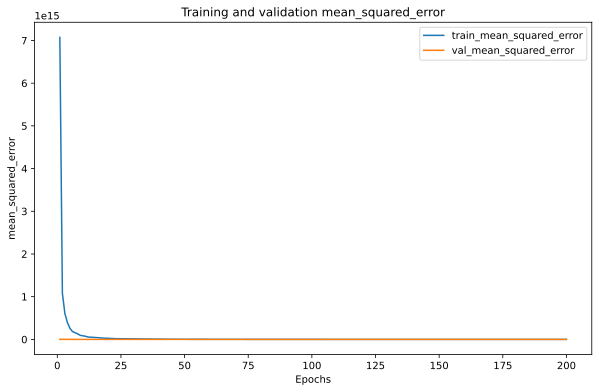

In [32]:
plot_metric(batched_history, 'mean_squared_error')


In [33]:
batched_model.evaluate(X_test, y_test, verbose=2)

39/39 - 0s - loss: 49.1678 - mean_squared_error: 49.1678 - 24ms/epoch - 612us/step


[49.16775894165039, 49.16775894165039]